In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

from itertools import zip_longest
from coupling import bottlenecked_min_ent_coupling
from matplotlib.colors import LinearSegmentedColormap

# Figure 10: Visualizing Couplings from MEC-B

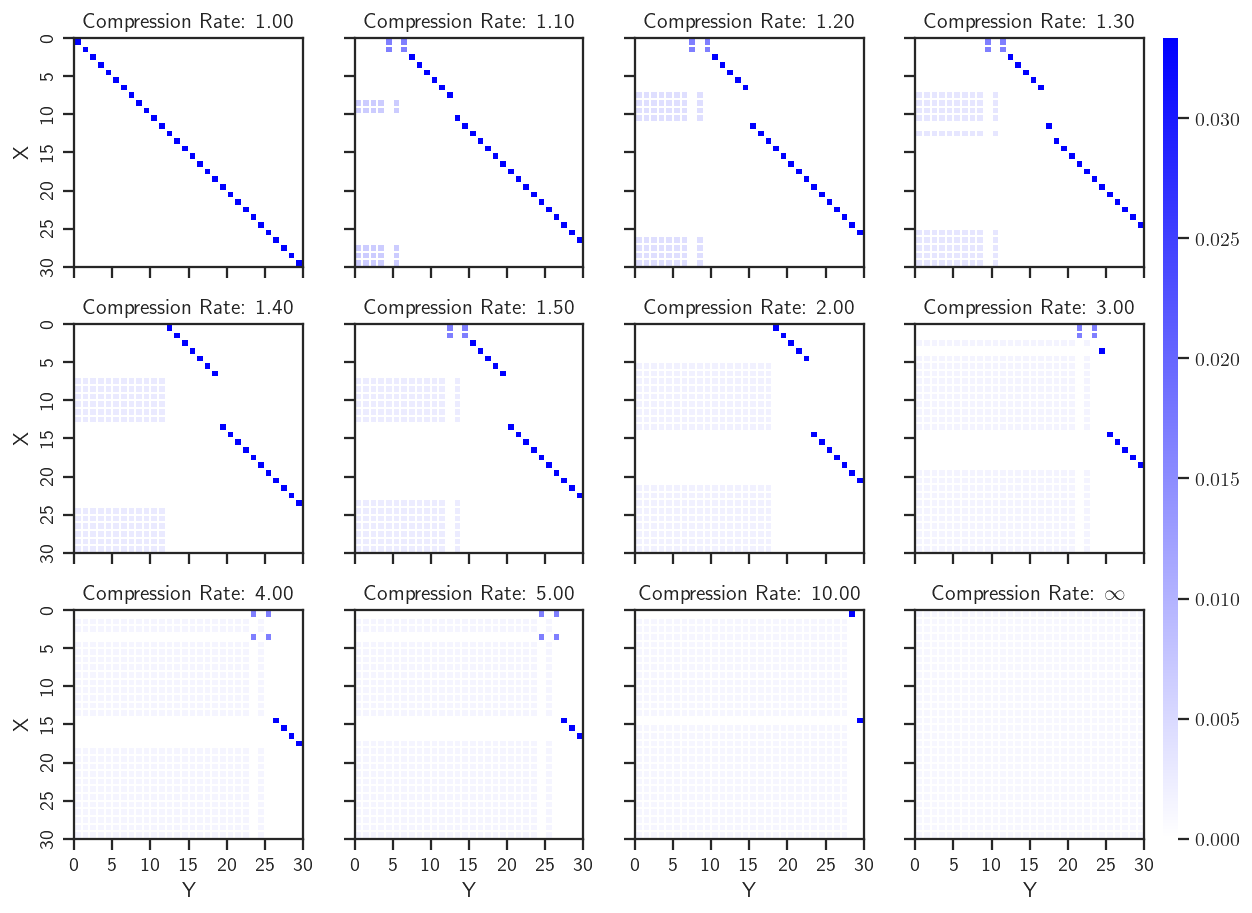

In [3]:
sns.set_theme()
sns.set_style("ticks")
plt.rcParams['text.usetex'] = True

# alphabet size:
n = 30

Px = np.ones(n)/n
Py = np.ones(n)/n

comp_range = np.arange(1, -.1, -.1)
comp_range = 1 / np.array([1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5, 10, np.inf])
fig, axs = plt.subplots(3, 4, figsize=(11, 8), 
                        sharex=True, sharey=True,
                        dpi=130,
                        gridspec_kw={'wspace':.05, 'hspace':.25}
                        )
cbar_ax = fig.add_axes([0.9, 0.11, 0.01, 0.77])

w2b = LinearSegmentedColormap.from_list('', ["white", "blue"])

for i, (comp, ax) in enumerate(zip_longest(comp_range, axs.flat)):
    
    if comp is None:
        ax.axis('off')
        continue
    
    R = comp * entropy(Px, base=2)
    Pxy = bottlenecked_min_ent_coupling(Px, Py, R)
    
    assert np.allclose(Pxy.sum(axis=0), Py)
    assert np.allclose(Pxy.sum(axis=1), Px)
    assert np.allclose(Pxy.sum(), 1)
    
    sns.heatmap(Pxy, square=True, vmin=0, vmax=1/n,
        ax=ax, cmap=w2b, linewidths=.1,
        cbar=i == 0, 
        cbar_ax=None if i else cbar_ax, 
    )
    
    comp_rate = f'{1/comp:.2f}' if comp >= 0.1 else r'$\infty$'
    ax.set_title(f'Compression Rate: {comp_rate}')
    
    tick_labels = np.array([0, 5, 10, 15, 20, 25, 30])
    tick_positions = tick_labels
    ax.set_xticks(tick_positions)
    ax.set_yticks(tick_positions)
    ax.set_xticklabels(tick_labels)
    ax.set_yticklabels(tick_labels)

    for _, spine in ax.spines.items():
        spine.set_visible(True)
    
plt.setp(axs[:, 0], ylabel=r'X')
plt.setp(axs[-1, :], xlabel=r'Y');